# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Yani Yulianti
- **Email:** yaniyul2712@gmail.com
- **ID Dicoding:** yaniyul

## Menentukan Pertanyaan Bisnis

- Apa hubungan antara parameter suhu (TEMP), tekanan udara (PRES), titik embun (DEWP) dan curah hujan (RAIN) dengan kualitas udara?
- Bagaimana kualitas udara pada daerah Dongsi di hari-hari mendatang?

## Import Semua Packages/Library yang Digunakan

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Data Wrangling

### Gathering Data

In [2]:
from google.colab import files
uploaded = files.upload()

Saving PRSA_Data_Aotizhongxin_20130301-20170228.csv to PRSA_Data_Aotizhongxin_20130301-20170228.csv
Saving PRSA_Data_Changping_20130301-20170228.csv to PRSA_Data_Changping_20130301-20170228.csv
Saving PRSA_Data_Dingling_20130301-20170228.csv to PRSA_Data_Dingling_20130301-20170228.csv
Saving PRSA_Data_Dongsi_20130301-20170228.csv to PRSA_Data_Dongsi_20130301-20170228.csv
Saving PRSA_Data_Guanyuan_20130301-20170228.csv to PRSA_Data_Guanyuan_20130301-20170228.csv
Saving PRSA_Data_Gucheng_20130301-20170228.csv to PRSA_Data_Gucheng_20130301-20170228.csv
Saving PRSA_Data_Huairou_20130301-20170228.csv to PRSA_Data_Huairou_20130301-20170228.csv
Saving PRSA_Data_Nongzhanguan_20130301-20170228.csv to PRSA_Data_Nongzhanguan_20130301-20170228.csv
Saving PRSA_Data_Shunyi_20130301-20170228.csv to PRSA_Data_Shunyi_20130301-20170228.csv
Saving PRSA_Data_Tiantan_20130301-20170228.csv to PRSA_Data_Tiantan_20130301-20170228.csv
Saving PRSA_Data_Wanliu_20130301-20170228.csv to PRSA_Data_Wanliu_20130301-2

In [4]:
dataframes =[]
for filename in uploaded.keys():
  df = pd.read_csv(filename)
  dataframes.append(df)

In [5]:
all_df = pd.concat(dataframes, ignore_index=True)

In [6]:
all_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


### Assessing Data

In [7]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [8]:
all_df.isna().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

In [9]:
print("Jumlah duplikasi: ", all_df.duplicated().sum())

Jumlah duplikasi:  0


In [10]:
all_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


### Cleaning Data

In [11]:
all_df.dropna(axis=0, inplace=True)

In [12]:
all_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

## Exploratory Data Analysis (EDA)

### Explore ...

In [56]:
columns_relevan = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN']
df_subset = all_df[columns_relevan]

In [57]:
# Mencari korelasi antara parameter PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP dan RAIN
correlation = df_subset.corr()

In [58]:
# Menentukan fitur (X) dan target (y)
X = all_df[['TEMP', 'PRES', 'DEWP', 'RAIN']]
y = all_df['PM2.5']

In [59]:
# Membagi dataset untuk pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
# Membuat model regresi linier
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [61]:
# Memprediksi nilai dengan data pengujian
y_pred = model.predict(X_test)

In [62]:
# Mengevaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error : ", mse)
print("R-squared : ", r2)

Mean Squared Error :  5242.951270685047
R-squared :  0.17561182901883488


In [ ]:
df_dongsi = all_df[all_df['station'] == 'Dongsi']

In [ ]:
# Mengonversi kolom year, month, day dan hour ke dalam datetime
df_dongsi['datetime'] = pd.to_datetime(df_dongsi[['year', 'month', 'day', 'hour']])

In [65]:
df_dongsi.set_index('datetime', inplace=True)

In [66]:
df_dongsi = df_dongsi[['PM2.5']]
df_dongsi = df_dongsi.asfreq('H')
df_dongsi = df_dongsi.interpolate()
df_dongsi.head()

,PM2.5
datetime,
2013-03-01 00:00:00,9.0
2013-03-01 01:00:00,4.0
2013-03-01 02:00:00,4.0
2013-03-01 03:00:00,4.0
2013-03-01 04:00:00,4.0


In [67]:
# Membuat fitur dan target
df_dongsi['target'] = df_dongsi['PM2.5'].shift(-1)
df_dongsi.dropna(inplace=True)

X_2 = df_dongsi[['PM2.5']]
y_2 = df_dongsi['target']

In [68]:
# Membagi data pelatihan dan pengujian
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, shuffle=False)

In [70]:
# Melatih regresi linier
model_2 = LinearRegression()
model_2.fit(X_train_2, y_train_2)

LinearRegression()

In [71]:
y_pred_2 = model_2.predict(X_test_2)

In [73]:
mse_2 = mean_squared_error(y_test_2, y_pred_2)
print("Mean Squared Error :" , mse_2)

Mean Squared Error : 429.8599806248113


In [79]:
# Membuat prediksi untuk 7 hari mendatang
forecast_steps = 24 * 7
last_value = X_test_2.iloc[-1].values.reshape(1, -1)

predictions = []
for _ in range(forecast_steps):
  next_predict = model_2.predict(last_value)[0]
  predictions.append(next_predict)
  last_value = np.array([[next_predict]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

In [81]:
# Dataframe untuk prediksi
future_dates = pd.date_range(start=y_test_2.index[-1], periods=forecast_steps + 1, inclusive='right')
forecast_df = pd.DataFrame(predictions, index=future_dates, columns=['PM2.5'])

In [82]:
print('Forecasted PM2.5 for next 7 days : ', forecast_df)

Forecasted PM2.5 for next 7 days :                           PM2.5
2017-03-01 22:00:00  24.539198
2017-03-02 22:00:00  26.043912
2017-03-03 22:00:00  27.514915
2017-03-04 22:00:00  28.952962
2017-03-05 22:00:00  30.358791
...                        ...
2017-08-11 22:00:00  90.030903
2017-08-12 22:00:00  90.068353
2017-08-13 22:00:00  90.104964
2017-08-14 22:00:00  90.140754
2017-08-15 22:00:00  90.175743

[168 rows x 1 columns]


## Visualization & Explanatory Analysis

### Pertanyaan 1:

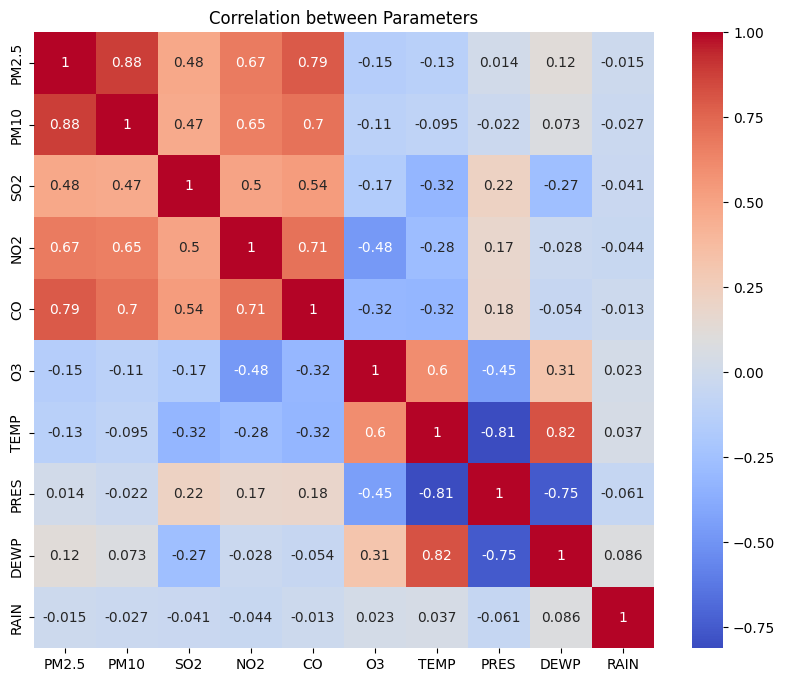

In [29]:
# Visualisasi Korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Parameters')
plt.show()

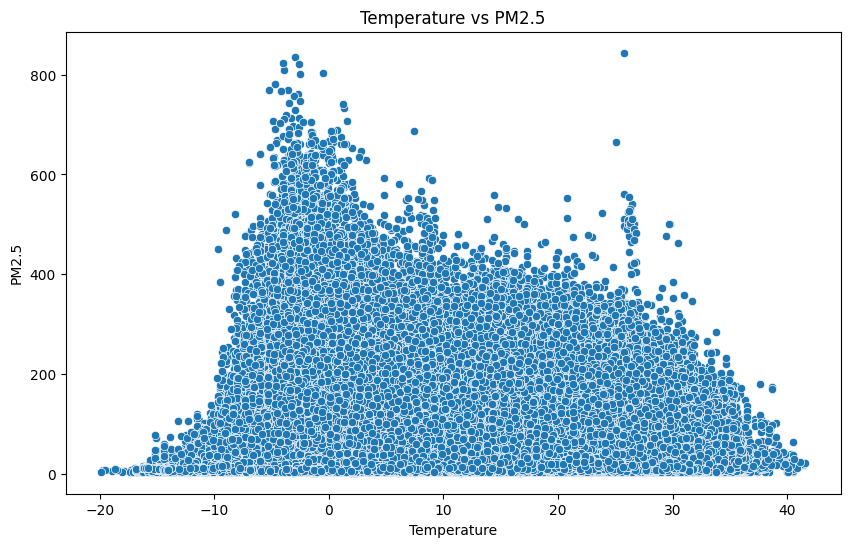

In [30]:
# Visualisasi Regresi
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TEMP', y='PM2.5', data=all_df)
plt.title('Temperature vs PM2.5')
plt.xlabel('Temperature')
plt.ylabel('PM2.5')
plt.show()

### Pertanyaan 2:

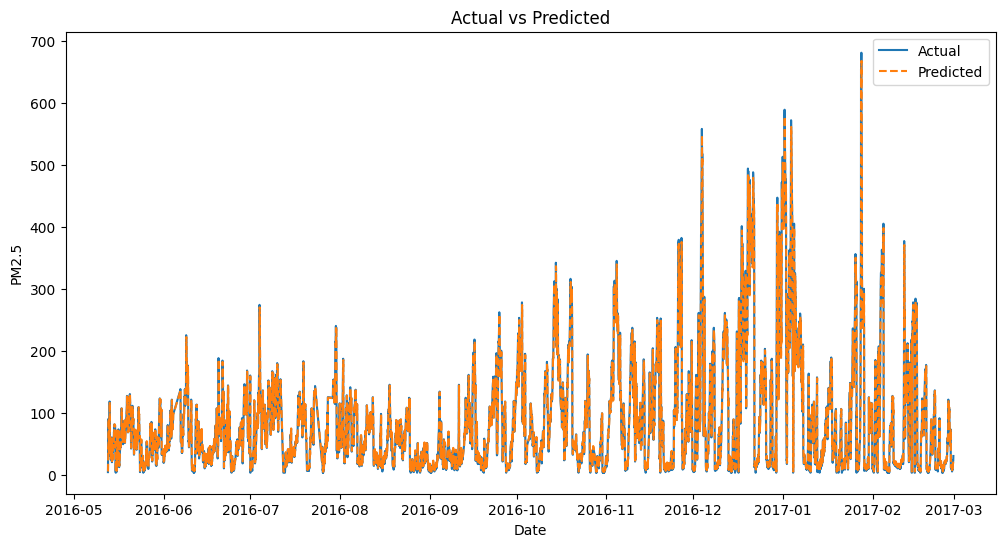

In [78]:
# Nilai aktual vs Prediksi
plt.figure(figsize=(12, 6))
plt.plot(y_test_2.index, y_test_2, label='Actual')
plt.plot(y_test_2.index, y_pred_2, label='Predicted', linestyle='--')
plt.title('Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

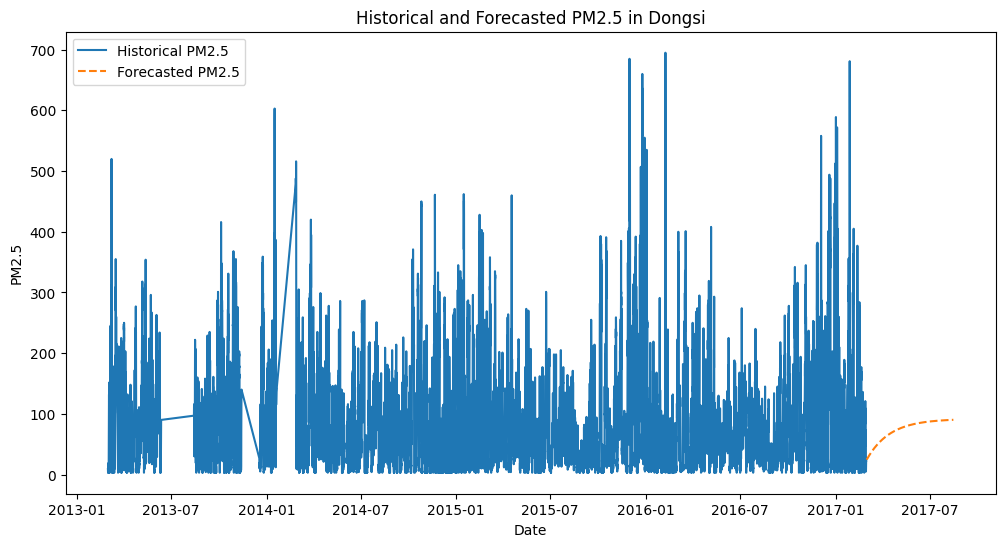

In [83]:
# Perkiraan station Dongsi dalam 7 hari ke depan
plt.figure(figsize=(12, 6))
plt.plot(df_dongsi.index, df_dongsi['PM2.5'], label='Historical PM2.5')
plt.plot(forecast_df.index, forecast_df['PM2.5'], label='Forecasted PM2.5', linestyle='--')
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.title('Historical and Forecasted PM2.5 in Dongsi')
plt.legend()
plt.show()

## Conclusion

### Conclution pertanyaan 1
Berdasarkan analisis di atas (korelasi dan regresi), beberapa parameter lingkungan memiliki korelasi yang signifikasn dengan parameter kualitas udara dan pada regresi dapat dilihat bahwa parameter PM2.5 tidak mampu menjelaskan dengan baik, yang artinya butuh paramater tambahan lain yang mungkin tidak tercakup dalam dataset ini.

### Conclution pertanyaan 2
Berdasarkan analisis di atas, prediksi PM2.5 untuk 7 hari ke depan tampak stabil. Ini mungkin menunjukkan bahwa model regresi linier menganggap tidak ada perubahan besar dalam faktor-faktor yang mempengaruhi PM2.5 dalam waktu dekat.


In [84]:
all_df.to_csv("all_data.csv", index=False)